# Lab: MSA, Conservation, Structural Homology, and Visualization (Teacher Version)


## Structure generation

Go to https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb and try to generate the structure for the test sequence

## Simple alignment + Sequence logo

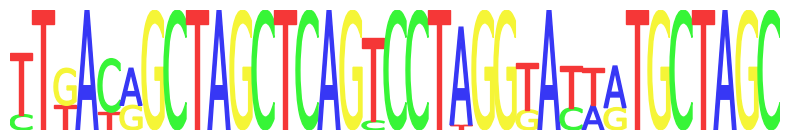

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics

# The list of Anderson promoters
seqs = [
    seq.NucleotideSequence("ttgacagctagctcagtcctaggtataatgctagc"),
    seq.NucleotideSequence("ttgacagctagctcagtcctaggtataatgctagc"),
    seq.NucleotideSequence("tttacagctagctcagtcctaggtattatgctagc"),
    seq.NucleotideSequence("ttgacagctagctcagtcctaggtactgtgctagc"),
    seq.NucleotideSequence("ctgatagctagctcagtcctagggattatgctagc"),
    seq.NucleotideSequence("ttgacagctagctcagtcctaggtattgtgctagc"),
    seq.NucleotideSequence("tttacggctagctcagtcctaggtactatgctagc"),
    seq.NucleotideSequence("tttacggctagctcagtcctaggtatagtgctagc"),
    seq.NucleotideSequence("tttacggctagctcagccctaggtattatgctagc"),
    seq.NucleotideSequence("ctgacagctagctcagtcctaggtataatgctagc"),
    seq.NucleotideSequence("tttacagctagctcagtcctagggactgtgctagc"),
    seq.NucleotideSequence("tttacggctagctcagtcctaggtacaatgctagc"),
    seq.NucleotideSequence("ttgacggctagctcagtcctaggtatagtgctagc"),
    seq.NucleotideSequence("ctgatagctagctcagtcctagggattatgctagc"),
    seq.NucleotideSequence("ctgatggctagctcagtcctagggattatgctagc"),
    seq.NucleotideSequence("tttatggctagctcagtcctaggtacaatgctagc"),
    seq.NucleotideSequence("tttatagctagctcagcccttggtacaatgctagc"),
    seq.NucleotideSequence("ttgacagctagctcagtcctagggactatgctagc"),
    seq.NucleotideSequence("ttgacagctagctcagtcctagggattgtgctagc"),
    seq.NucleotideSequence("ttgacggctagctcagtcctaggtattgtgctagc"),
]
# Sequences do not need to be aligned
# -> Create alignment with trivial trace
# [[0 0 0 ...]
#  [1 1 1 ...]
#  [2 2 2 ...]
#     ...     ]
alignment = align.Alignment(
    sequences=seqs,
    trace=np.tile(np.arange(len(seqs[0])), len(seqs))
    .reshape(len(seqs), len(seqs[0]))
    .transpose(),
    score=0,
)
# Create sequence logo from alignment
fig = plt.figure(figsize=(8.0, 1.5))
ax = fig.add_subplot(111)
profile = seq.SequenceProfile.from_alignment(alignment)
graphics.plot_sequence_logo(ax, profile, scheme="rainbow")
# Remove the entire frame
ax.axis("off")
fig.tight_layout()
plt.show()

## Part 1: Download and align sequences

First try
`uv add muscle3`
`uv add clustalo`
If any of this succeeds, proceed with it.

In [16]:
!uv pip list

Using Python 3.13.9 environment at: /Users/jakubswistak/Developer/bioinformatics_mini_2025/.venv
Package                   Version
------------------------- --------------
anyio                     4.11.0
appnope                   0.1.4
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.14.2
biopython                 1.85
biotite                   1.4.0
biotraj                   1.2.2
bleach                    6.2.0
certifi                   2025.8.3
cffi                      2.0.0
charset-normalizer        3.4.3
click                     8.3.0
clustalo                  0.1.2
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
executing         

In [ ]:

# https://www.biotite-python.org/latest/examples/gallery/sequence/homology/homolog_msa.html
from tempfile import gettempdir
import matplotlib.pyplot as plt
import biotite.application.blast as blast
import biotite.application.muscle as muscle
import biotite.database.entrez as entrez
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta

# Download sequence of Streptococcus pyogenes Cas9
file_name = entrez.fetch("Q99ZW2", gettempdir(), "fa", "protein", "fasta")
fasta_file = fasta.FastaFile.read(file_name)
ref_seq = fasta.get_sequence(fasta_file)
# Find homologous proteins using NCBI Blast
# Search only the UniProt/SwissProt database
blast_app = blast.BlastWebApp("blastp", ref_seq, "swissprot", obey_rules=False)
blast_app.start()
blast_app.join()
alignments = blast_app.get_alignments()
# Get hit IDs for hits with score > 200
hits = []
for ali in alignments:
    if ali.score > 200:
        hits.append(ali.hit_id)
# Get the sequences from hit IDs
hit_seqs = []
for hit in hits:
    file_name = entrez.fetch(hit, gettempdir(), "fa", "protein", "fasta")
    fasta_file = fasta.FastaFile.read(file_name)
    hit_seqs.append(fasta.get_sequence(fasta_file))

# # Perform a multiple sequence alignment using MUSCLE
# app = muscle.MuscleApp([], bin_path="muscle3")
# app.start()
# app.join()
# alignment = app.get_alignment()
# # Print the MSA with hit IDs
# print("MSA results:")
# gapped_seqs = alignment.get_gapped_sequences()
# for i in range(len(gapped_seqs)):
#     print(hits[i], " " * 3, gapped_seqs[i])

# # Visualize the first 200 columns of the alignment
# # Reorder alignments to reflect sequence distance

# fig = plt.figure(figsize=(8.0, 8.0))
# ax = fig.add_subplot(111)
# order = app.get_alignment_order()
# graphics.plot_alignment_type_based(
#     ax,
#     alignment[:200, order.tolist()],
#     labels=[hits[i] for i in order],
#     show_numbers=True,
# )
# fig.tight_layout()

# plt.show()


SubprocessError: Could not determine 'muscle3' version from the string ''

In [26]:
from biotite.application.muscle import Muscle5App, MuscleApp



alignment = clustalo.ClustalOmegaApp.align(sequences)
# Print the MSA with hit IDs
print("MSA results:")
gapped_seqs = alignment.get_gapped_sequences()
for i in range(len(gapped_seqs)):
    print(hits[i], " " * 3, gapped_seqs[i])

# Visualize the first 200 columns of the alignment
# Reorder alignments to reflect sequence distance

fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)
order = app.get_alignment_order()
graphics.plot_alignment_type_based(
    ax,
    alignment[:200, order.tolist()],
    labels=[hits[i] for i in order],
    show_numbers=True,
)
fig.tight_layout()

plt.show()


MSA results:
Q99ZW2     -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------MGVMAYPFLFCLLLVHFGLGAIGASRE------------------------------------------------------------------------------------------APSRPDPPRERTLRAKQ-H--------------------------------------------------------------AQQPARA-----SASDPSAPWSRSTDGTIL--------AQ----KLAEEVPMDVASYLYTGDSHKLKRANCSSRYELAGLPGKSPALASSHPSLHGALDTLTHATNFLNMMLQSNKSREQ--------NLQ------------------------D----DLEWYQ-------ALV------------------RSLLE---GEPSISRAAITFSTESLSAPAPQVFLQAT-------------REESRILLQDLSSSAHHLANATLETEWFHGLRRKWRTHLHRRGSNQGP-RGLGHSWRRRDGL--------------SGDKSHV

IndexError: list index out of range

## Conservation of binding site

In [18]:
# https://www.biotite-python.org/latest/examples/gallery/sequence/homology/lexa_conservation.html
import matplotlib.pyplot as plt
import biotite.application.clustalo as clustalo
import biotite.database.entrez as entrez
import biotite.sequence as seq
import biotite.sequence.graphics as graphics
import biotite.sequence.io.genbank as gb

# Search for protein products of LexA gene in UniProtKB/Swiss-Prot database
query = entrez.SimpleQuery("lexA", "Gene Name") & entrez.SimpleQuery(
    "srcdb_swiss-prot", "Properties"
)
# Search for the first 200 hits
# More than 200 UIDs are not recommended for the EFetch service
# for a single fetch
uids = entrez.search(query, db_name="protein", number=200)
file = entrez.fetch_single_file(uids, None, db_name="protein", ret_type="gp")
# The file contains multiple concatenated GenPept files
# -> Usage of MultiFile
multi_file = gb.MultiFile.read(file)
# Separate MultiFile into single GenBankFile instances
files = [f for f in multi_file]
print("Definitions:")
for file in files[:20]:
    print(gb.get_definition(file))
print()
print("Sources:")
for file in files[:20]:
    print(gb.get_source(file))

Definitions:
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=Transcription regulator LexA; AltName: Full=LexA-related repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.
RecName: Full=LexA repressor.

Sources:
Mycobacterium tuberculosis H37Rv
Herpetosiphon aurantiacus DSM 785
Clostridium botulinum A3 str. Loch Maree
Klebsiella variicola 342
Brucella canis ATCC 23365
Bacillus cereus ATCC 14579
Acidothermus cellulolyticus 11B
Syntrophobacter fumaroxidans MPOB
Escherichia coli HS
Pseudomonas paraeruginosa PA7
Klebsiella pneumoniae s

In [19]:
# Abbreviate
def abbreviate(species):
    # Remove possible brackets
    species = species.replace("[", "").replace("]", "")
    splitted_species = species.split()
    return "{:}. {:}".format(splitted_species[0][0], splitted_species[1])


print("Sources:")
all_sources = [abbreviate(gb.get_source(file)) for file in files]
for source in all_sources[:20]:
    print(source)

Sources:
M. tuberculosis
H. aurantiacus
C. botulinum
K. variicola
B. canis
B. cereus
A. cellulolyticus
S. fumaroxidans
E. coli
P. paraeruginosa
K. pneumoniae
C. hydrogenoformans
S. degradans
M. xanthus
S. sp.
E. coli
I. loihiensis
S. aureus
B. diazoefficiens
L. interrogans


In [20]:
# List of sequences
binding_sites = []
# List of source species
sources = []
# Set for ignoring already listed sources
listed_sources = set()
for file, source in zip(files, all_sources):
    if source in listed_sources:
        # Ignore already listed species
        continue
    bind_feature = None
    annot_seq = gb.get_annotated_sequence(file, include_only=["Site"], format="gp")
    # Find the feature for DNA-binding site
    for feature in annot_seq.annotation:
        # DNA binding site is a helix-turn-helix motif
        if (
            "site_type" in feature.qual
            and feature.qual["site_type"] == "DNA binding"
            and "H-T-H motif" in feature.qual["note"]
        ):
            bind_feature = feature
    if bind_feature is not None:
        # If the feature is found,
        # get the sequence slice that is defined by the feature...
        binding_sites.append(annot_seq[bind_feature])
        # ...and save the respective source species
        sources.append(source)
        listed_sources.add(source)
print("Binding sites:")
for site in binding_sites[:20]:
    print(site)

Binding sites:
IREIGDAVGLTSTSSVAHQLR
IRDIQRELSISSTSVVAYNLR
VREICKAVGLSSTSSVHFHLK
RAEIAQRLGFRSPNAAEEHLK
FDEMKEALDLASKSGIHRLIT
VREIGQAVGLASSSTVHGHLS
MREIGEAVGLTSTSSVAHQLM
YEEIRQNLGFRSLNAVFKHLK
RAEIAQRLGFRSPNAAEEHLK
RAEIAQELGFKSPNAAEEHLK
RAEIAQRLGFRSPNAAEEHLK
IREICQGVGLSSPSTVHHHLK
RAEIANQLGFRSANAAEEHLK
IREIGEHMDIRSTNGVNDHLK
RAEIAHKLGFRSANSAEEHLK
VREIGEAVGLASSSTVHGHLS
FDEMKDALDLRSKSGIHRLIT
IREIGDEFGITAKGAYDHLK
VREIGEAVGLASSSTVHGHLA
MREIGQAVGLSSTSSVAHQLM


In [ ]:
# align
alignment = muscle.MuscleApp.align(binding_sites, bin_path="")
fig = plt.figure(figsize=(4.5, 4.0))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    ax, alignment[:, :20], labels=sources[:20], symbols_per_line=len(alignment)
)
# Source names in italic
ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontstyle": "italic"})
fig.tight_layout()

AttributeError: type object 'Muscle5App' has no attribute 'MuscleApp'

In [ ]:
# sequence logo
profile = seq.SequenceProfile.from_alignment(alignment)

print("Consensus sequence:")
print(profile.to_consensus())

fig = plt.figure(figsize=(8.0, 3.0))
ax = fig.add_subplot(111)
graphics.plot_sequence_logo(ax, profile, scheme="flower")
ax.set_xticks([5, 10, 15, 20])
ax.set_xlabel("Residue position")
ax.set_ylabel("Bits")
# Only show left and bottom spine
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
fig.tight_layout()

plt.show()

## Phylogenetic tree

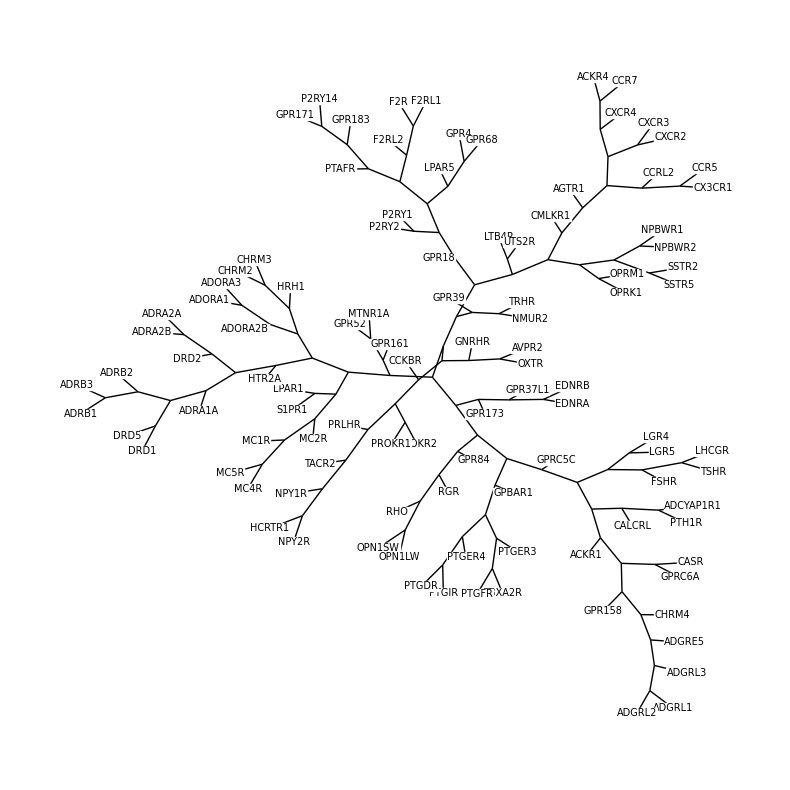

In [23]:
# https://www.biotite-python.org/latest/examples/gallery/sequence/homology/gpcr_evolution.html
import re
import matplotlib.pyplot as plt
import networkx as nx
import biotite.application.clustalo as clustalo
import biotite.database.uniprot as uniprot
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.io.fasta as fasta
import biotite.sequence.phylo as phylo

# The bovine GPCRs are investigated
SPECIES = "Bovine"


query = (
    uniprot.SimpleQuery("reviewed", "true")
    &
    # Bovine proteins
    uniprot.SimpleQuery("organism_name", "Bos taurus")
    &
    # Keyword ID for GPCRs
    uniprot.SimpleQuery("keyword", "KW-0297")
)
ids = uniprot.search(query)


# Download sequence files and read the sequences from it
genes = []
sequences = []
# RegEx pattern used to extract the gene name from fasta header
gene_name_pattern = "(?<=GN=)[0-9A-Za-z]+"
for file in uniprot.fetch(ids, "fasta"):
    fasta_file = fasta.FastaFile.read(file)
    # There is only one entry in file
    for header, seq_str in fasta_file.items():
        genes.append(re.search(gene_name_pattern, header).group(0))
        sequences.append(seq.ProteinSequence(seq_str))


# Create multiple sequence alignment with Clustal Omega
# alignment = muscle.MuscleApp.align(sequences)
alignment = clustalo.ClustalOmegaApp.align(sequences)

# The distance measure required for the tree calculation is the
# percentage of non-identical amino acids in the respective two
# sequences
distances = 1 - align.get_pairwise_sequence_identity(alignment, mode="shortest")
# Create tree via neighbor joining
tree = phylo.neighbor_joining(distances)
# Convert to NetworkX graph
# For the graph visualization, the edge directions are unnecessary
graph = tree.as_graph().to_undirected()

fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.gca()
ax.axis("off")
# Calculate position of nodes in the plot
pos = nx.kamada_kawai_layout(graph)
# Assign the gene names to the nodes that represent a reference index
node_labels = {i: name for i, name in enumerate(genes)}
nx.draw_networkx_edges(graph, pos, ax=ax)
nx.draw_networkx_labels(
    graph,
    pos,
    ax=ax,
    labels=node_labels,
    font_size=7,
    # Draw a white background behind the labeled nodes
    # for better readability
    bbox=dict(pad=0, color="white"),
)
fig.tight_layout()

plt.show()

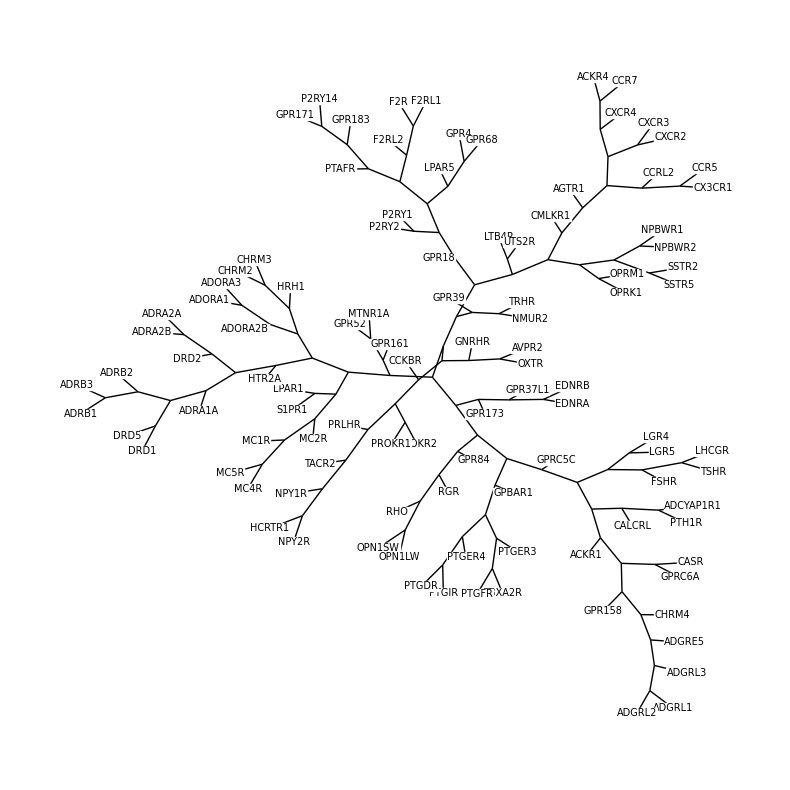

In [24]:
alignment = clustalo.ClustalOmegaApp.align(sequences)

# The distance measure required for the tree calculation is the
# percentage of non-identical amino acids in the respective two
# sequences
distances = 1 - align.get_pairwise_sequence_identity(alignment, mode="shortest")
# Create tree via neighbor joining
tree = phylo.neighbor_joining(distances)
# Convert to NetworkX graph
# For the graph visualization, the edge directions are unnecessary
graph = tree.as_graph().to_undirected()

fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.gca()
ax.axis("off")
# Calculate position of nodes in the plot
pos = nx.kamada_kawai_layout(graph)
# Assign the gene names to the nodes that represent a reference index
node_labels = {i: name for i, name in enumerate(genes)}
nx.draw_networkx_edges(graph, pos, ax=ax)
nx.draw_networkx_labels(
    graph,
    pos,
    ax=ax,
    labels=node_labels,
    font_size=7,
    # Draw a white background behind the labeled nodes
    # for better readability
    bbox=dict(pad=0, color="white"),
)
fig.tight_layout()

plt.show()

## Sequence similarity heatmap

In [ ]:
# https://www.biotite-python.org/latest/examples/gallery/sequence/homology/pi3k_alignment.html
import warnings
import matplotlib.pyplot as plt
import numpy as np
import biotite
import biotite.application.clustalo as clustalo
import biotite.database.entrez as entrez
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta

uids = ["5JHB_A", "5LUQ_A", "5FLC_B", "5YZ0_A", "5NP0_A", "4FUL_A"]
names = ["PI3K", "DNA-PKcs", "mTOR", "ATR", "ATM", "hSMG-1"]

sequences = []
file = fasta.FastaFile.read(
    entrez.fetch_single_file(uids, None, db_name="protein", ret_type="fasta")
)
for header, seq_str in file.items():
    sequences.append(seq.ProteinSequence(seq_str))

alignment = muscle.MuscleApp.align(sequences)

In [ ]:
def get_average_normalized_similarity(trace_code, matrix, seq_i, pos_i):
    code1 = trace_code[seq_i, pos_i]
    if code1 == -1:
        return np.nan
    similarities = np.zeros(trace_code.shape[0])
    for i in range(trace_code.shape[0]):
        code2 = trace_code[i, pos_i]
        if code2 == -1:
            similarities[i] = 0
        else:
            sim = matrix[code1, code2]
            # Normalize (range 0.0 - 1.0)
            min_sim = np.min(matrix[code1])
            max_sim = np.max(matrix[code1])
            sim = (sim - min_sim) / (max_sim - min_sim)
            similarities[i] = sim
    # Delete self-similarity
    similarities = np.delete(similarities, seq_i)
    return np.average(similarities)


matrix = align.SubstitutionMatrix.std_protein_matrix()
# Get the alignment columns as symbols codes (-1 for gaps)
trace_code = align.get_codes(alignment)
similarities = np.zeros(trace_code.shape)
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        similarities[i, j] = get_average_normalized_similarity(
            trace_code, matrix.score_matrix(), i, j
        )

figure = plt.figure(figsize=(8.0, 3.0))
ax = figure.add_subplot(111)
heatmap = ax.pcolor(similarities, cmap="RdYlGn", vmin=0.0, vmax=1.0)
cbar = figure.colorbar(heatmap)
figure.tight_layout()

In [ ]:
# with bins
def calculate_bins(similarities, bin_count):
    edges = np.linspace(0, similarities.shape[1], bin_count, dtype=int)
    edges = np.append(edges, similarities.shape[1])
    binned_similarities = np.zeros(similarities.shape)
    for i in range(similarities.shape[0]):
        for j in range(len(edges) - 1):
            binned_similarities[i, edges[j] : edges[j + 1]] = np.nanmean(
                similarities[i, edges[j] : edges[j + 1]]
            )
    return binned_similarities


with warnings.catch_warnings():
    # Catch warnings about empty slice for gap-only parts
    warnings.simplefilter("ignore")
    similarities = calculate_bins(similarities, 100)

figure = plt.figure(figsize=(8.0, 3.0))
ax = figure.add_subplot(111)
heatmap = ax.pcolor(similarities, cmap="RdYlGn", vmin=0.0, vmax=1.0)
cbar = figure.colorbar(heatmap)
# Furthermore, add some labels to the figure
cbar.set_label("Average normalized similarity")
ax.set_xlabel("Alignment position")
ax.set_yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
ax.set_yticklabels(names)
figure.tight_layout()

## Part 3: Visualize Structure using py3Dmol


If py3Dmol is not installed, install with:

```
pip install py3Dmol
```



In [24]:

# Download and visualize structure using py3Dmol
import requests
import os

# Download 1A3N.pdb from RCSB if not already present
pdb_id = "1A3N"
pdb_file = f"{pdb_id}.pdb"
pdb_path = f"/Users/paweld/Projects/bioinformatics_mini_2025/notebooks/labs/{pdb_file}"

if not os.path.exists(pdb_path):
    print(f"Downloading {pdb_id}.pdb from RCSB...")
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        with open(pdb_path, 'w') as f:
            f.write(response.text)
        print(f"Successfully downloaded {pdb_file}")
    else:
        print(f"Failed to download {pdb_id}.pdb")
else:
    print(f"{pdb_file} already exists, using local file")

# Visualize structure (if py3Dmol available)
view = py3Dmol.view()
view.addModel(open('1A3N.pdb', 'r').read(),'pdb')
view.setBackgroundColor('white')
view.setStyle({'chain':'A'}, {'cartoon': {'color':'spectrum'}})
view.zoomTo()
view.show()


1A3N.pdb already exists, using local file


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Installing Chimera or ChimeraX locally


- **Chimera** download: https://www.cgl.ucsf.edu/chimera/
- **ChimeraX** download: https://www.rbvi.ucsf.edu/chimerax/

To open a PDB:

```
chimera 1A3N.pdb
```
